In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
#data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]

In [28]:
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  19<sup>th</sup> September, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [26]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq'], axis=0, inplace=True)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return"))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [29]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [30]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- Markets shifted from risk-on to risk-off towards the later part of the week as lack of further policy support especially from the fiscal front prompted markets to reassess recovery prospects, recognizing the diminishing space from the monetary policy front. This was highlighted by Fed Chair Powell at this week’s FOMC meeting who cautioned of downside risks to recovery despite an upward revision to 2020 growth outlook (from -6.5% to -3.7%) in its latest quarterly assessment. Projection for 2021 was however revised down from +5.0% to +4.0%. Unemployment rate was also revised lower from 9.3% to 7.6% (2020) and from 6.5% to 5.5% (2021) while core PCE was revised higher from +1.0% to +1.5% (2020) and from +1.5% to +1.7% (2021).


- Across this week’s policy meets, the policy tone was not dissimilar, as policy makers guided for prolonged accommodativeness amid risks to growth outlook. The latest dot plot reveals that the Fed expects interest rate to stay near zero at least until 2023 as Fed Chair Powell highlighted risks to recovery. BOE went a step further in saying it is exploring negative interest rate citing risks in the labour market. BOJ maintained its asset purchases and bond yields target but sounded less pessimistic on the economy, somewhat similar to RBA assessment on a recovery in the Australian economy despite some downside risks from renewed virus and lockdown in Victoria.


- While the latest slew of economic releases this week seemed to add to signs of dissipating recovery momentum, China data stayed resilient in August. This has spurred hope that the economic recovery remains forthcoming, and hence building expectations that this would provide the platform and catalyst for recovery in other parts of the world especially in the Asian region. Among the major economies, industrial production out of the US, Eurozone and Japan this week all pointed to slowing growth momentum. 


- US retail sales also showed signs of tapering off as the extension of top up jobless benefits still showed no signs of being approved. The labour market remains weak with the weekly initial jobless claims hovering near the 1.0m mark, though cliams were seen easing from the highs. This week job numbers also showed the labour market remained weak in the UK but that in Australia surprised on the upside.


- **Wall Street** closed deeply in the red on Friday and the S&P and Nasdaq linked a third weekly decline, as sharp losses in the tech sector continued. Shares of Big Tech dropped steeply led by Apple (-3.2%), Amazon (-1.8%), and Microsoft (-1.2%). On the earnings side, US Steel rallied 9% after the company reported a smaller-than-expected quarterly loss. On the policy front, Democrats and Republicans are still far from a deal on the coronavirus aid follow-on bill to the previous USD 2 trillion package. The Dow Jones lost 245 points or 0.9% to 27,657. The S&P 500 tumbled 38 points or 1.1% to 3,319. The Nasdaq fell 117 points or 1.1% to 10,793. During the week, the Dow Jones was flattish, whereas the S&P 500 declined 0.7% and the Nasdaq retreated 0.6%.


- Christmas came early for **FedEx**. Residential shipments surged as consumers keep shopping from home, reaching levels the delivery giant normally sees during the holiday season. Thanks to the extra cargo, FedEx on Tuesday posted the highest quarterly revenue in its history. The increasing shift to online shopping has been a boon to the FedEx Ground business, which handles shipments for store chains such as Target Corp. and Dick’s Sporting Goods Inc. Now, FedEx and rival United Parcel Service Inc. are bracing for an additional torrent of packages during the holiday season, testing networks that are already strained. FedEx shares added 5.8% Wednesday.


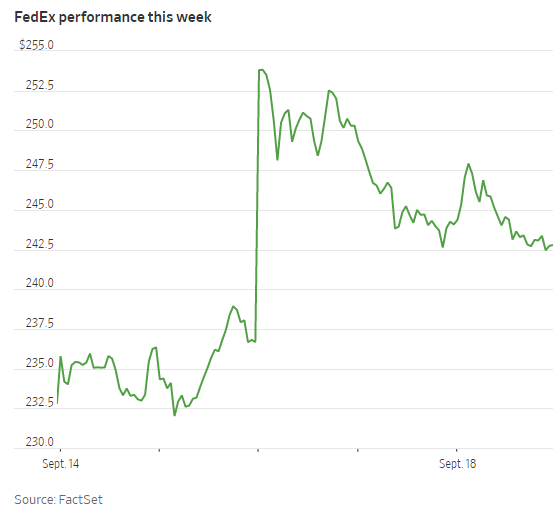

- **Kraft Heinz** is shredding its ties with a large chunk of its cheese business. The food maker said Tuesday that it had reached a deal to sell a portion of its cheese brands to France’s Groupe Lactalis SA for USD 3.2 billion. The deal comes as some food companies struggle to keep up with unprecedented demand for groceries during the pandemic. The sale will include Kraft shredded and blocks of cheese and the Cracker Barrel brand in the U.S. Kraft Heinz will keep Philadelphia cream cheese, Velveeta, Cheez Whiz and Kraft Singles in the U.S, along with its macaroni-and-cheese business world-wide. Kraft Heinz shares added 0.3% Tuesday.

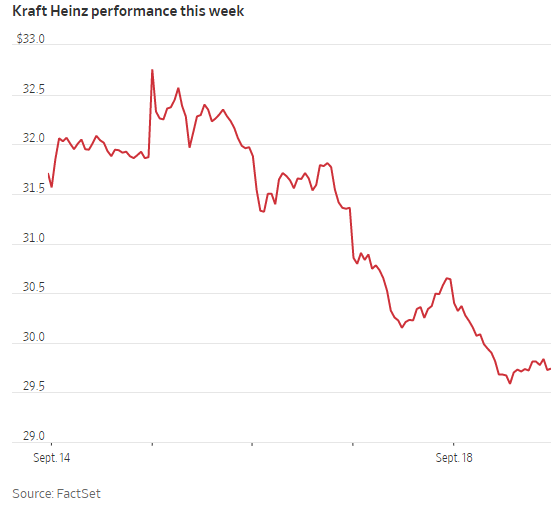

- **Hershey** wants to save Halloween from the real-life scare of Covid-19. The candy maker is offering tips on trick-or-treating safety to protect sales during its biggest holiday. The site, Halloween2020.org, maps Covid-19 risk level by county and offers suggestions, like masked trick-or-treating in low-risk areas and at-home Halloween candy hunts in high-risk areas. The coronavirus pandemic didn’t bolster demand for sweets like it did for staples like cereal and soup, making the upcoming holidays even more important. Hershey also introduced its Halloween offerings earlier than usual in the hopes of selling more, and produced less themed candy to avoid having tons of discounted leftovers. Hershey shares fell 0.7% Monday.

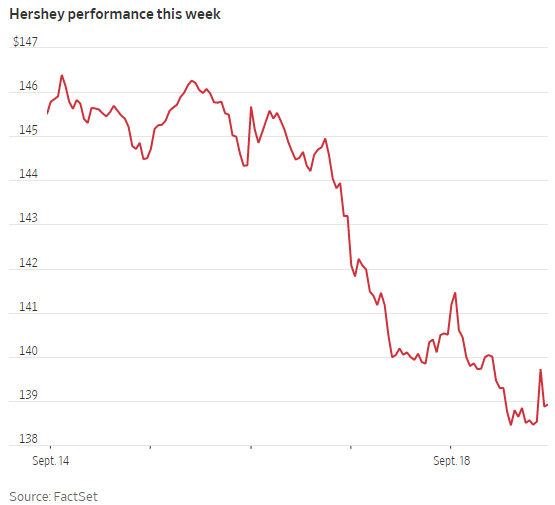

- **Facebook** isn’t generating any “likes” from antitrust authorities. The Wall Street Journal reported Tuesday that the Federal Trade Commission is gearing up to file a possible antitrust lawsuit against the company by the end of the year, following more than a year investigating concerns that Facebook has been using its powerful market position to stifle competition. The inquiry is part of a broader effort to examine the conduct of a handful of dominant tech companies. No final decision had been made as of Tuesday whether to sue Facebook, and the commission doesn’t always bring cases even when it is making preparations to do so. Facebook shares fell 3.3% Wednesday.

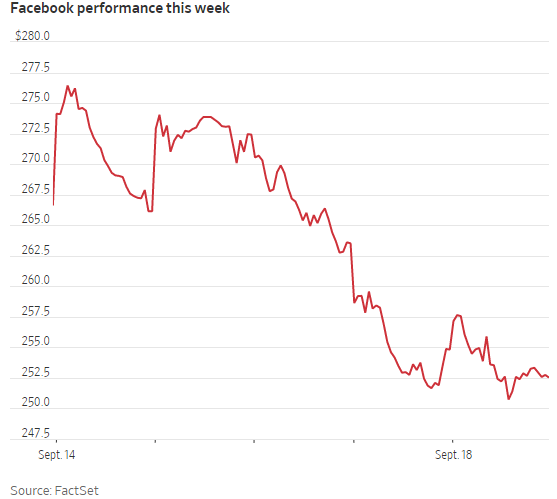

- **SoftBank** is on a selling spree. The Japanese tech-investment conglomerate said on Friday that it was selling U.S.-based wireless-services unitBrightstar Corp. to a private-equity firm founded by a former Brightstar executive. This deal came on the heels of its sale of semiconductor company Arm Holdings to graphics-chip giant Nvidia Corp. for USD 40 billion. SoftBank’s string of divestitures began in March, after a series of stumbles in its USD 100 billion venture-capital pool, the Vision Fund. The losses, coupled with the overall rout in markets, drove Chief Executive Masayoshi Son to announce USD 42 billion in asset sales to fund share buybacks and debt redemptions. American depositary shares of SoftBank lost 2.2% Friday.

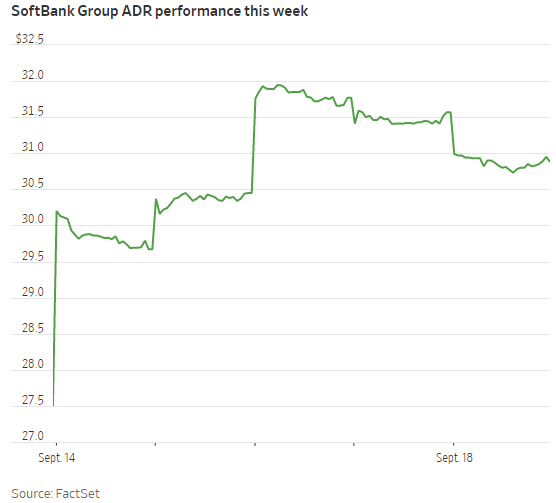

- **European** stocks closed lower on Friday, with the DAX 30 falling 0.7% to end at an over one-week low of 13,116 and other major indexes down more than 0.7% as travel and bank stocks underperformed on fears that a resurgence in COVID-19 cases across the region could hamper economic recovery. Some European nations already announced new restrictions aiming to curb surging infections including Denmark and Greece while the UK was considering a new national lockdown. On the corporate front, Germany's Covestro rose on reports on PE interest for the group while Caixabank and state-owned Bankia approved a merger plan that will create the Spanish largest bank. For the week, the DAX 30 shed 0.7%.



- **Mexico**’s IPC lost 114 points or 0.3% to 36,017 on Friday, as technology shares in the US tumbled and the S&P 500 and Nasdaq booked their third weekly loss. On the macro side, INEGI data showed that real wages in the manufacturing sector climbed 0.9% yoy in July, as job creation accelerated. Meanwhile, the MXN depreciated in the session after booking a 6-month high nudged by a 10% weekly jump in WTI crude prices. On the pandemic side, coronavirus cases rose by 3.2 thousand on Thursday, the least since the end of June. During the week, the IPC lost 0.5%.


- **Brazil**’s Ibovespa declined 1808 points or 1.8% to 98,290 on Friday led by financials and energy stocks, as the US tech sell-off continued and domestic fiscal concerns persisted. On the economic data front, latest figures showed the number of unemployed people in Brazil rose to 13.7 million in the week ended August 29th from 12.6 million in the previous week, as the pandemic hit the labour market. During the week, the Ibovespa retreated less than 0.1%.


- Retail sales in **Canada** rose 0.6 percent over a month earlier in July 2020, following a downwardly revised record 22.7 percent gain in the previous month but below market expectations of a 1 percent increase. Sales were up in 6 of 11 subsectors, in particular at the motor vehicle & parts dealers subsector (+3.3%) on continued pent-up demand for motor vehicles following pandemic-driven dealership closures in the spring; gasoline stations (6.1%) on the back of higher gasoline prices, the continued reopening of the economy, and more Canadians travelling and buying locally; and clothing & clothing accessories stores (11.2%). 


- Meanwhile, sales fell at food & beverage stores (-2.1%); general merchandise (-0.4%) and sporting goods, hobby and music (-8.8%). Overall, the recovery in retail sales has been V-shaped, with sales in June and July, rebounding and surpassing February's pre-pandemic levels. Statistics Canada also provided an early estimate of August's retail sales of a 1.1% gain.


- The FTSE Bursa **Malaysia** KLCI closed down 6 points or 0.4% at 1,507 on Friday, amid concerns about rising COVID-19 cases across the globe and as major global central banks promised this week to keep supporting their economies but without much details. At the same time, traders shrug off news that Japan and Malaysia signed a bilateral currency swap arrangement that enables authorities to swap up to USD 3 billion of their currencies. On the corporate front, Top Glove jumped more than 2% on plans to list on the Hong Kong stock exchange after record profit. For the week, the FTSE Bursa Malaysia KLCI added 0.1%.


- RBNZ will be the next central bank to deliberate on policy decision next week and no change is expected even though RBNZ could potentially shed a downbeat outlook. This would likely be evident in exports numbers due a day after the meeting. SNB and BOT are also scheduled to meet next.


- On the data front, preliminary September PMI numbers from the US, EU, UK and Japan will be scrutinized for further clues on the recovery momentum, which is crucial in assessing the state of the economy especially upon expiry of some earlier aids to both the households and businesses.


- On top of that, US housing data, regional Fed activity gauges, durable goods orders are in the pipeline. It would be interesting to see if home sales mirror the softening trend in housing starts this week. Also, we have some inflation readings from Malaysia, Singapore and Hong Kong which are all expected to reinforce the case of deflation. Singapore industrial production and Hong Kong exports are also in the pipeline.

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

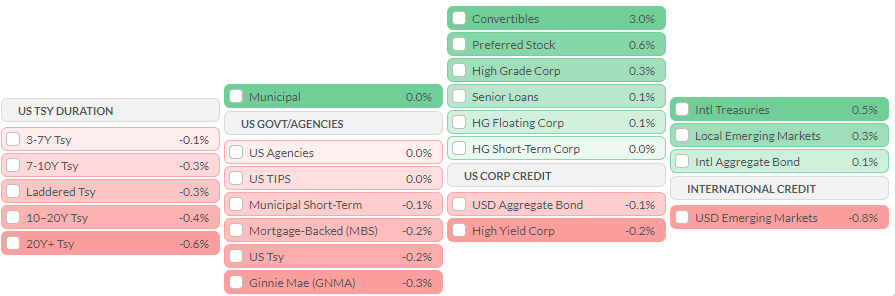

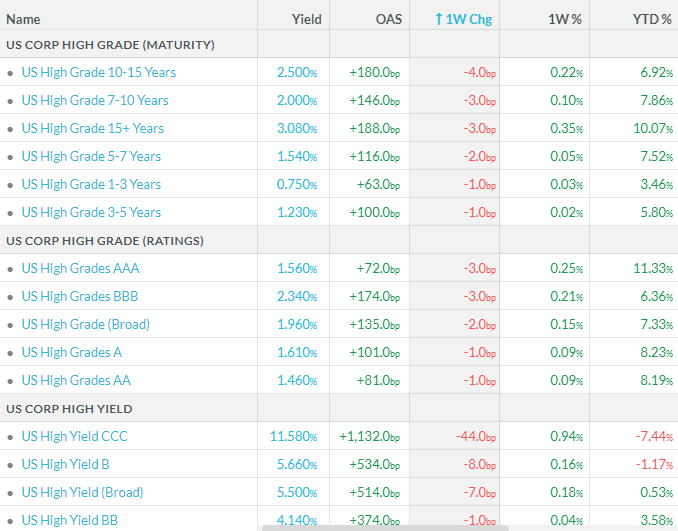

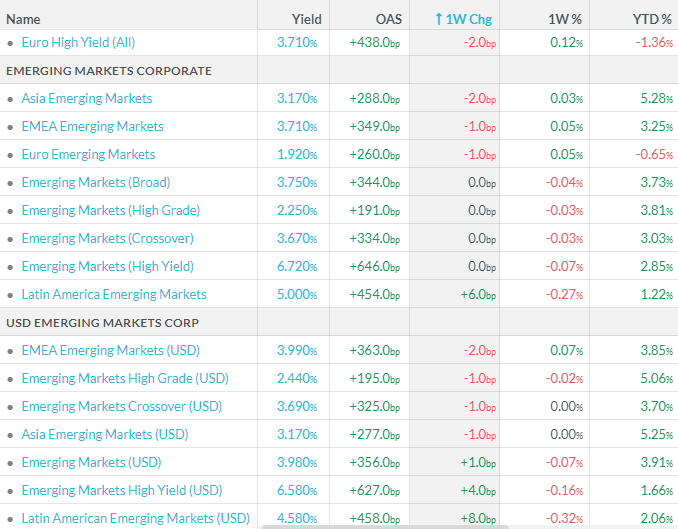

**HIGHLIGHTS**


- The week under review saw US Treasuries ended weaker following FOMC statement that was consistent with Fed Chair Powell’s comments last month that the Fed will delay tightening policy to achieve inflation that averages 2% over a period of time. Overall benchmark yields rose a mere 0-2bps with the curve steepening slightly; with the long-end pressured the most. The 2Y benchmark; closed almost unchanged at 0.14% whilst the much-watched 10Y (which traded within a very narrow 0.67%-0.70% range); edged 1bps up at 0.69%. The long-end of the curve has been sensitive to auction supply concerns and may continue to do so going forward. Bond traders may not likely be compelled to take big positions next week on lack of further clues on the economic climate.


‘GHOST STORIES’

- Minneapolis Fed President Neel Kashkari, in contrast, laid out a more open-ended view in written comments describing why he dissented against the rate-setting Federal Open Market Committee’s policy statement on Wednesday. The Fed, he felt, was setting itself up to make the same mistake it has in the past of reacting too quickly to inflation “ghost stories” and risked nipping off job growth too soon. He said the Fed instead should switch its focus to core inflation, a slower moving variable that excludes volatile commodity prices, and ensure that it reached 2% on a “sustained basis.”


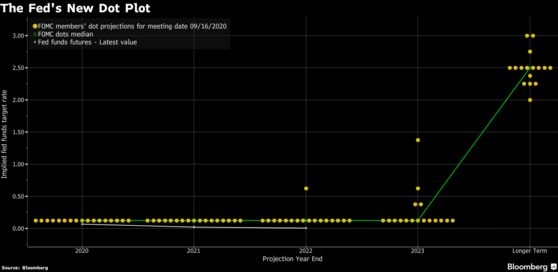

- The Bank of Japan also kept its programs constant despite inflation turning negative. This is a sign that, while inflation remains the key metric for the Fed, the Bank of Japan is stepping away from its singular focus on inflation. It is a reflection of the new Japanese prime minister not placing a heavy emphasis on price targets, instead focusing on economic recovery and market stability.


- In this context of continued growth and loose monetary policy, spreads and core yields have rallied globally. The yield on the 10-year US Treasury has remained in a tight range since April, and has traded between 0.63% and 0.75% since 8 August. This looks likely to persist – and even in the event of an early positive vaccine surprise, its hard to expect yields to rise far above 1-1.20%. Spreads are also tight across risk assets, having retraced substantially over the past two quarters. This means investors need to look more carefully at niche sectors to find yield.


- One can expect strong demand across markets to be a consistent feature of the coming months, whether it comes from central banks or from investors on the continued search for yield. The supply backdrop could vary more by market: in some sectors, such as high yield, higher supply could weigh on the market (perhaps providing buying opportunities), whereas lower supply forecasts elsewhere (US investment grade, for example, where some forecasts expect net supply to drop by USD 200 billion in Q4) should continue to provide a tailwind for spreads.


- The Central Bank of Russia held its benchmark interest rate at 4.25 percent during its September meeting, saying inflation rates have been slightly higher than expectations in recent months due to demand recovery after the lockdown as well as the weakening of the ruble. Still, policymakers warned that disinflationary risks still prevail in the medium run as the pace of return of the global and Russian economies to their potential will slow down. The central bank expects annual inflation to reach 3.7-4.2 percent in 2020, 3.5-4.0 percent in 2021 and to stabilize close to 4 percent later on. Officials also said they will consider the necessity of further key rate reduction at its upcoming meetings.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [31]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [32]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [33]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [34]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [35]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

> Dollar strengthened after FOMC but gave back its gains on Thursday. The DXY weakened slightly to 93 from 93.33 a week ago. 10y-UST yield traded 2bps higher at 0.68%. The FOMC kept rates unchanged, as well as the speed of implementation of QE but adjusted its forecasts for inflation, GDP and other indicators. Beside the BOJ, who left the policy balance rate at -0.10%, the BOE also voted unanimously to leave monetary policy on hold. Up next week we have RBNZ, SNB and BOT.


> On the majors, EUR remains consolidating within 1.17 to 1.20, awaiting new catalyst to resume the rally. JPY is trading at the strongest level since end Jul 2020. GBP had a wild week, the renewed fear of no-deal Brexit and dovish BOE is capping the GBP below 1.30. The commodity currencies also rebounded together with the higher commodity prices and crude oil. As Fed indicated that interest rates will stay low for years to come, the Dollar might continue to stay weak in the medium term.


- **USD:** : The dollar index settled at 93 against a basket of currencies on Friday, booking a 0.3% weekly decline, its first since August. Weaker-than-expected data on industrial production, retail sales, housing starts and initial jobless claims raised concerns about the US economic recovery. At the same time, a lack of progress in US fiscal stimulus negotiations, coupled with a resurgence in coronavirus cases, the US Federal Reserve's promise to keep rates at record lows and US-China tensions continued to weigh on the greenback.


- **EUR**: The euro traded at 1.185 on Friday and was set for minimal gains for the second week in a row. The common currency was supported by broad dollar weakness after data released on Thursday showed that the number of unemployed people filing new benefit claims fell less than expected last week, while nearly 30 million people were on unemployment benefits at the end of August. On Thursday, the euro hit one-month low of 1.174 after the US Federal Reserve pledged to keep interest rates on hold until at least the end of 2023, but failed to unveil more policy easing.For the week ahead, Markit PMIs will be key to watch. Eurozone PMI outperformance may trigger some EUR strength, vice versa. 


- **GBP**: The British pound traded slightly higher at USD 1.30 on Friday after data showed Britain's retail sales were 4% higher pre-pandemic levels. Still, the currency remained under pressure after the Bank of England signaled it was considering negative interest rates, while the prospect of a chaotic end to the Brexit transition period in December, rising COVID-19 cases and higher unemployment added to uncertainty.


- **JPY**: Yen remained an outperformer in the G10 space. USD/JPY hit a low of 104.53 on 17 September, now consolidating just above the figure. Incoming Prime Minister Suga’s smooth transition to office, and Bank of Japan’s less pessimistic tone is supporting stability on the Japan front. Japan's consumer price inflation dropped to 0.2% yoy in August as the pandemic continued to hamper consumption excluding food.  


- **AUD**: AUD/USD stayed on the sidelines for most of the week, with a range of 0.7253-0.7345. It looked to be gradually recovering, albeit not as evident as NZD. This came as employment report was positive. Employment change registered a surprise 111.0k increase in August (Jul: 119.2k revised). Unemployment rate also surprised by improving to 6.8% in August (Jul: 7.5%), its lowest in four months, with an estimated half of the job losses since the pandemic has been recovered.


- **MXN**: The Mexican peso traded lower at 21.0 against the USD, moving away from a near six-month high touched earlier in the session amid mounting concerns over a spike in global coronavirus infections. Mexico’s Health Ministry reported 3,182 new infections on Thursday bringing the total to over 680,000 cases. Earlier this week, the country’s central bank announced that it has extended measures designed to strengthen credit channels and provide liquidity in the financial system.


- **BRL**: The Brazilian real was trading lower at 5.31 against the greenback, moving away from an over six-week high reached earlier this week amid persistent fiscal concerns and surging global coronavirus cases. Also, latest data which showed the number of unemployed people in Brazil rose to 13.7 million in the week ended August 29th from 12.6 million in the previous week as the pandemic hit the labour market weighed on sentiment.


- **CAD**: The Canadian dollar was trading lower at 1.31 against the USD, remaining close to a one-week low touched in the previous session, amid concerns over surging global coronavirus cases. The currency was also pressured by latest domestic data which showed a drop in underlying retail sales in July. The country’s central bank left its benchmark interest rate unchanged at the effective lower bound of 0.25% on September 9th, and said that it will continue its quantitative easing program.


- **ZAR**: Market sentiment continued to be supported by optimism over an economic recovery as the country prepares to move to lockdown level 1 on Monday while investors wait for more details about an action plan currently being developed to revive the economy. On the downside, the struggling South African Airways (SAA) faces protests and strike action from worker unions, after the government failed to procure the necessary funding needed by the airline to execute its business rescue plan.


- **RUB**: The Russian ruble depreciated slightly to 75.3 on Friday and was set for a 0.7% weekly loss, pressured by falling oil prices and as policymakers left the door open to further interest rate cuts in upcoming monetary policy meetings. Still, the central bank held its benchmark interest rate at 4.25 percent during its September meeting. The benchmark Brent crude fell more than 1% to USD 42.8 a barrel on Friday but was on track for a weekly gain. The currency has been pressured by political risks related to the crisis in Belarus, the suspected poisoning of Alexei Navalny, and by a drop in daily sales of foreign currency by the finance ministry.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [36]:
#comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [38]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [45]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [46]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [47]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [48]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h', color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

> The Bloomberg Commodity Index, which tracks a basket of major commodities spread evenly across energy, metals and agriculture, traded higher for the first time in three weeks. A softer dollar, continued buying momentum among major U.S. crop futures and a Saudi-fueled bounce in oil products, together with Chinese economic optimism all helped support a week of broad-based gains across all three sectors. Gold traded quite passively with ‘algo’ traders currently in charge, something that for now has resulted in an unusually high positive correlation with the movements in the S&P 500 index.


- **Crude oil** found a bid following the recent sharp correction and break below the trend that had prevailed since June. Driving the recovery has been upbeat economic data from China and the U.S., the world's biggest consumers, along with a general improvement in the risk appetite after U.S. mega-cap stocks found support.


- Most important, however, was the strong verbal intervention given by Saudi Energy Minister Prince Abdulaziz bin Salman following the OPEC+ meeting this past week. He opened the meeting with a forceful condemnation of members that try to get away with pumping too much crude. He went further during the Q&A session with a journalist by warning short sellers not to challenge the Kingdom’s resolve by saying, “I’m going to make sure whoever gambles on this market will be ouching like hell”. 


- While potentially a sign of frustration that OPEC+ production cuts have yet to deliver a strong recovery, the minister was probably also trying to prevent increased short selling amid what OPEC, the IEA and BP call a fragile demand recovery at a time of very high spare capacity and inventories. Since July when fundamentals, but not the price, started to weaken the gross short held by hedge funds in WTI and Brent crude oil has more than doubled to 235 million barrels.


- While short sellers may move the market for a short period of time, fundamentals will always be the main driver. And while the recent 15% correction in Brent crude oil helped to bring the price more in line with current fundamentals, a recovery from here needs more than verbal intervention, despite it coming from the world’s biggest producer..


- Gold as well as silver traded slightly higher on the week despite some midweek softness after the FOMC delivered nothing new and U.S. stocks challenged support. While the Fed has promised rock-bottom rates for longer than three years, the initial cross-market reaction with lower stocks and a stronger dollar raised some concerns that the Fed’s tool box has started to look empty, with the element of surprise no longer there.


- Gold's moves are looking passive as its movements have been mirroring those seen in U.S. stocks. The lack of fresh input from bonds and the dollar has meant that algorithmic trading systems, often trading correlations between markets, have moved to the driving seat, thereby creating an unusually positive correlation between gold and stocks. Correlations work as a trading strategy to a point. With this in mind, the very short-term direction may be dictated by the stock market.


- U.S. natural gas slumped back below USD 2, a seasonal low going back almost 20 years. Lower demand triggered by lockdowns and Hurricane Sally disruptions impacting both demand and exports helped drive a bigger-than-expected weekly inventory build. In early trading on Friday the price found support at the key USD 1.94 level, but nervous trading probably will persist ahead of the annual turnaround from the injection to winter extraction season, when demand for heating exceeds production.


- The disparity between platinum and palladium ETFs has widened this year as a strong rebound in Chinese car sales helped fuel demand for gasoline autocatalysts.Year-to-date, the Aberdeen Standard Physical Palladium Shares ETF (NYSEArca: PALL) surged 18.0% while the  Aberdeen Standard Physical Platinum Shares ETF (NYSEArca: PPLT) declined 3.0%. However, the price of platinum, which is used in diesel-engine catalytic converters, has fallen behind due to the greater preference for gasoline-powered automobiles, which use palladium. The higher demand for palladium for gasoline-powered vehicles has increased as China’s gasoline-dominated auto markets rebound while Europe’s diesel-heavy car sector struggles amid rising new coronavirus cases and lockdowns, the Wall Street Journal reports.


- A soybean-related exchange traded fund has been gaining momentum, with soy prices touching a two-year high on Friday, as China ramps up purchases of U.S. exports. The Teucrium Soybean Fund (NYSEArca: SOYB) rose 1.3% on Friday and increased 9.4% over the past month. Meanwhile, CBOT soybean futures were up 1.5% to USD 10.4375 per bushel, breaking above the USD 10 mark for the first time since May 2018.


- Soybeans look set for a sixth weekly gain as China continues to step up purchases after adverse weather these past few months damaged crops in some areas of the country. According to the U.S. Department of Agriculture, soybean sales in the season that started September 1 have reached a record 30 million metric tons, with more than half going to China. During the past week it broke back above USD 10/bu to the highest level since May 2018.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

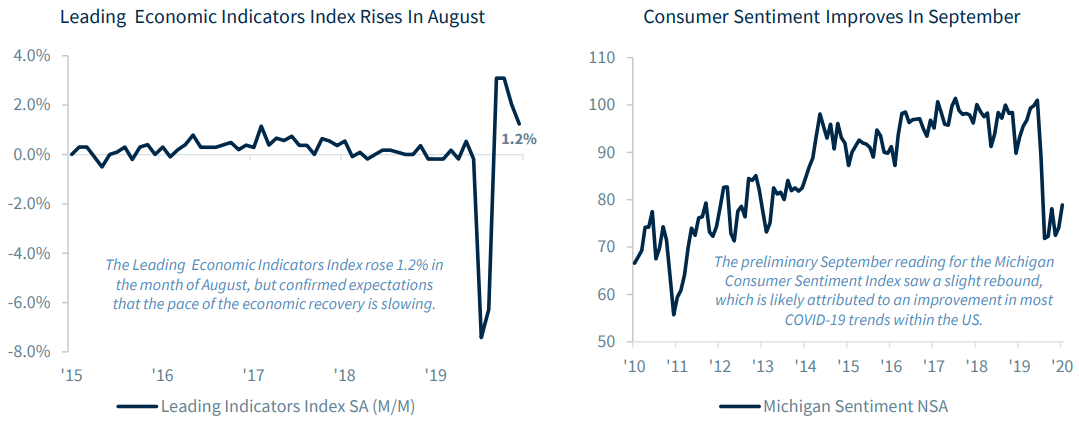

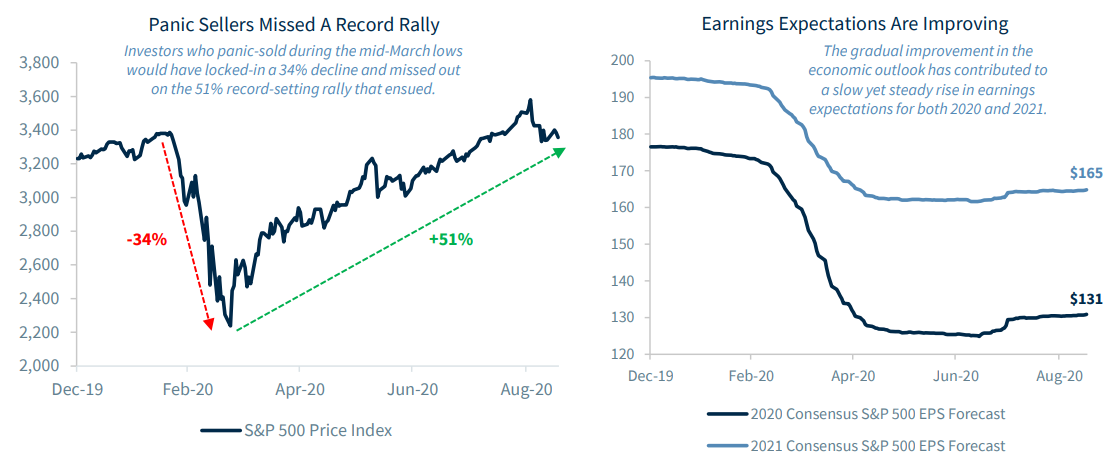

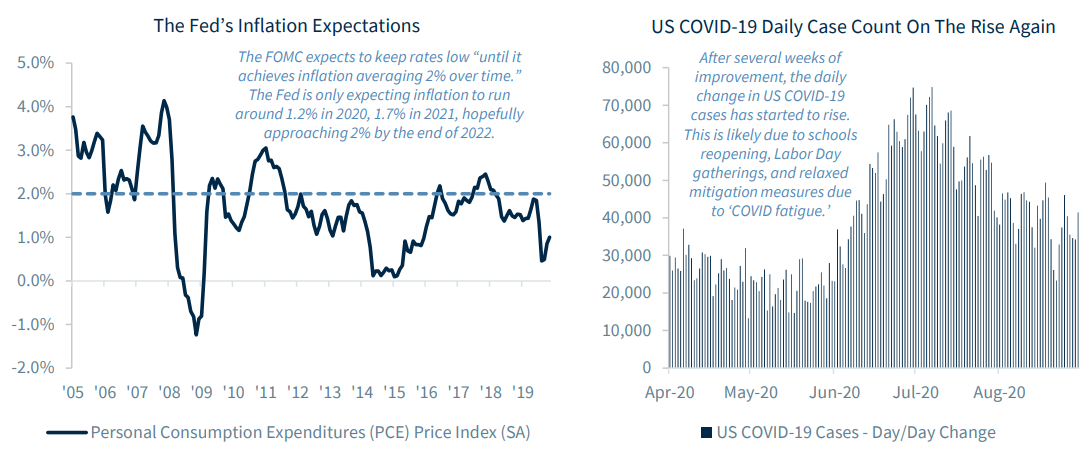

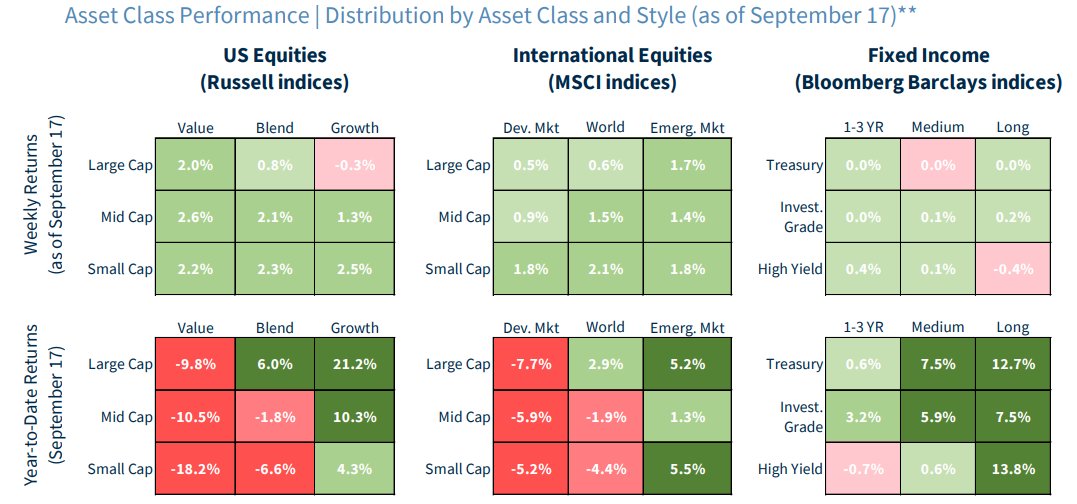

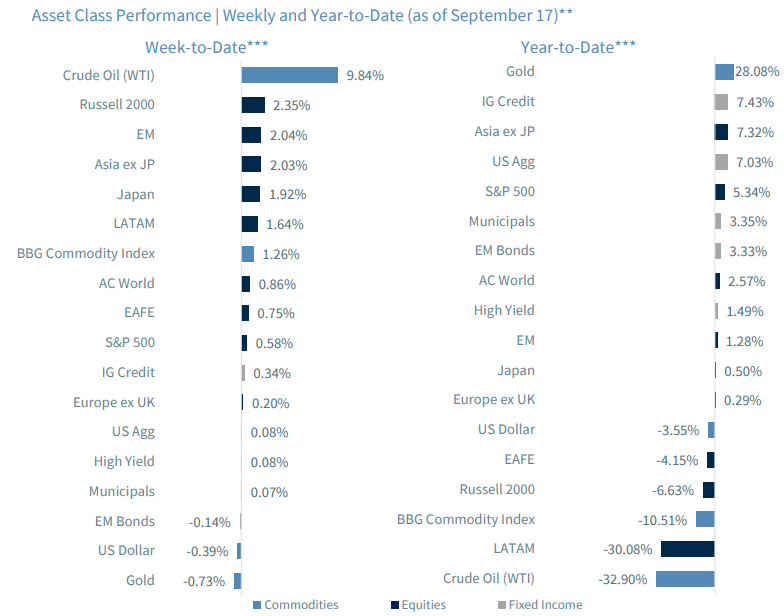

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [49]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)